In [4]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as np
import seaborn as sns
import os

from tensorflow.keras.preprocessing.image import load_img, img_to_array
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense,Input,Dropout,GlobalAveragePooling2D,Flatten,Conv2D,BatchNormalization,Activation,MaxPooling2D
from keras.optimizers import Adam,SGD,RMSprop

In [8]:
picture_size = 48
folder_path = "images/images/"

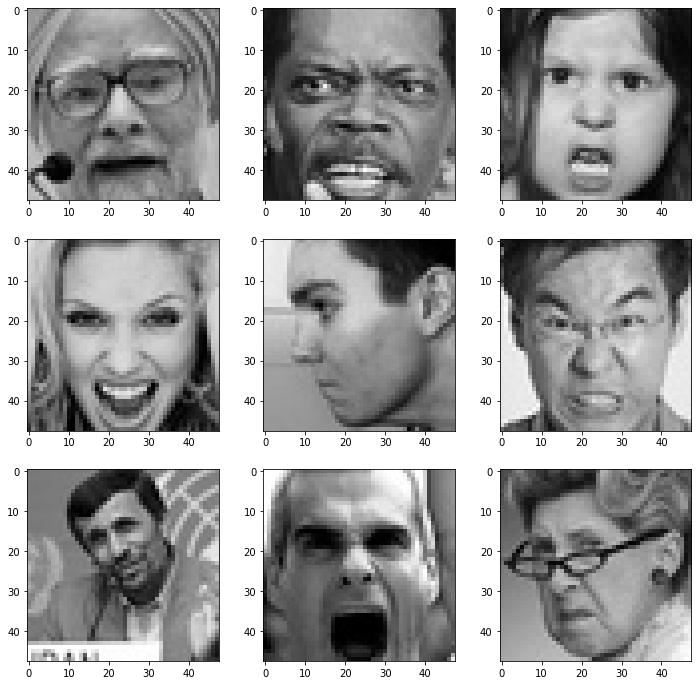

In [9]:
expression = 'angry'

plt.figure(figsize=(12,12))
#Display 9 images
for i in range(1,10,1):
    #Let the output images display 3 by 3
    plt.subplot(3,3,i)
    img=load_img(folder_path+"train/"+expression+"/"+
                 os.listdir(folder_path+"train/"+expression)[i], target_size=(picture_size,picture_size))
    plt.imshow(img)
plt.show()

In [12]:
batch_size = 128

datagen_train = ImageDataGenerator()
datagen_val = ImageDataGenerator()

train_set = datagen_train.flow_from_directory(folder_path+"train",
                                             target_size = (picture_size,picture_size),
                                             color_mode = "grayscale",
                                             batch_size = batch_size,
                                             class_mode = 'categorical',
                                             shuffle = True)

test_set = datagen_val.flow_from_directory(folder_path+"validation",
                                          target_size = (picture_size,picture_size),
                                          color_mode = "grayscale",
                                          batch_size = batch_size,
                                          class_mode = 'categorical',
                                          shuffle = False)                                          

Found 28821 images belonging to 7 classes.
Found 7066 images belonging to 7 classes.


In [13]:
from keras.optimizers import Adam, SGD, RMSprop
from keras.models import Sequential

no_of_classes = 7
model = Sequential()

#1st CNN Layer
#64 is filter size, 3x3 is kernel size, 48x48 is image size, 1 is channel size (grayscale)
model.add(Conv2D(64,(3,3),padding = 'same', input_shape = (48,48,1)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.25))

#2nd CNN Layer
model.add(Conv2D(128,(5,5),padding = 'same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.25))

#3rd CNN Layer
model.add(Conv2D(512,(3,3),padding = 'same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.25))

model.add(Flatten())

#Fully connected layer 1st layer
model.add(Dense(256))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

#Fully connected layer 2nd layer
model.add(Dense(512))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

model.add(Dense(no_of_classes,activation='softmax'))

opt = Adam(lr = 0.0001)
model.compile(optimizer=opt,loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 48, 48, 64)        640       
                                                                 
 batch_normalization_5 (Batc  (None, 48, 48, 64)       256       
 hNormalization)                                                 
                                                                 
 activation_5 (Activation)   (None, 48, 48, 64)        0         
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 24, 24, 64)       0         
 2D)                                                             
                                                                 
 dropout_5 (Dropout)         (None, 24, 24, 64)        0         
                                                                 
 conv2d_4 (Conv2D)           (None, 24, 24, 128)      

## Fitting the Model with Training and Validation Data

In [14]:
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

checkpoint = ModelCheckpoint("./model.h5", monitor='val_acc',verbose=1,save_best_only=True,mode='max')

#define a early stopping to avoid overfitting
early_stopping = EarlyStopping(monitor='val_loss',
                              min_delta=0,
                              patience=3,
                              verbose=1,
                              restore_best_weights=True)

reduce_learningrate = ReduceLROnPlateau(monitor='val_loss',
                                        factor=0.2,
                                        patience=3,
                                        verbose=1, 
                                        min_delta=0.0001)

callbacks_list = [early_stopping,checkpoint,reduce_learningrate]

epochs = 48

In [16]:
#history = model.fit_generator(generator=train_set)
history = model.fit(train_set,
                             steps_per_epoch=train_set.n//train_set.batch_size,
                             epochs=epochs,
                             validation_data = test_set,
                             validation_steps = test_set.n//test_set.batch_size,
                             callbacks=callbacks_list)

Epoch 1/48
225/225 [==============================] - 369s 2s/step - loss: 1.9049 - accuracy: 0.2775 - val_loss: 1.6386 - val_accuracy: 0.3582 - lr: 1.0000e-04
Epoch 2/48
225/225 [==============================] - 343s 2s/step - loss: 1.7019 - accuracy: 0.3549 - val_loss: 1.6973 - val_accuracy: 0.3760 - lr: 1.0000e-04
Epoch 3/48
225/225 [==============================] - 345s 2s/step - loss: 1.5999 - accuracy: 0.3885 - val_loss: 1.4652 - val_accuracy: 0.4392 - lr: 1.0000e-04
Epoch 4/48
225/225 [==============================] - 350s 2s/step - loss: 1.5244 - accuracy: 0.4171 - val_loss: 1.4754 - val_accuracy: 0.4382 - lr: 1.0000e-04
Epoch 5/48
225/225 [==============================] - 336s 1s/step - loss: 1.4632 - accuracy: 0.4376 - val_loss: 1.3853 - val_accuracy: 0.4683 - lr: 1.0000e-04
Epoch 6/48
225/225 [==============================] - 322s 1s/step - loss: 1.4070 - accuracy: 0.4617 - val_loss: 1.3997 - val_accuracy: 0.4760 - lr: 1.0000e-04
Epoch 7/48
225/225 [====================

Epoch 25: early stopping


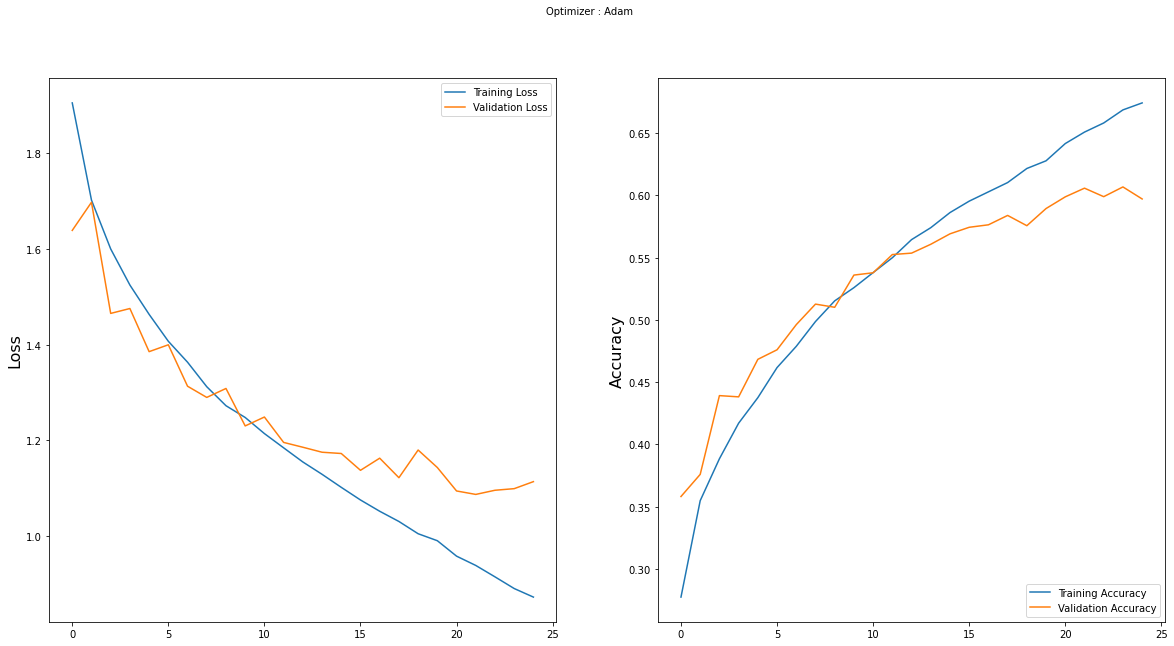

In [17]:
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
plt.suptitle('Optimizer : Adam', fontsize=10)
plt.ylabel('Loss', fontsize=16)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')

plt.subplot(1,2,2)
plt.ylabel('Accuracy', fontsize=16)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.show()